In [ ]:
import pandas as pd
import csv

In [ ]:
npr = pd.read_csv('/content/npr.csv')

In [ ]:
npr.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')


In [ ]:
dtm = cv.fit_transform(npr['Article'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
LDA=LatentDirichletAllocation(n_components=7,random_state=42)

In [ ]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [ ]:
import random

In [ ]:
features = cv.get_feature_names_out()

In [ ]:
len(features)

54777

In [ ]:
for i in range(10):
  random_word_id=random.randint(0,54776)
  print(features[random_word_id])

storytellers
gustav
dollar
posing
madani
regimen
highly
conduct
tween
obamas


In [ ]:
for i in range(10):
  random_word_id=random.randint(0,54776)
  print(features[random_word_id])

shines
showpiece
heating
romantic
baldonado
profanity
nevada
jogs
flattering
secluded


In [ ]:
len(LDA.components_)

7

In [ ]:
LDA.components_

array([[8.64332806e+00, 2.38014333e+03, 1.42900522e-01, ...,
        1.43006821e-01, 1.42902042e-01, 1.42861626e-01],
       [2.76191749e+01, 5.36394437e+02, 1.42857148e-01, ...,
        1.42861973e-01, 1.42857147e-01, 1.42906875e-01],
       [7.22783888e+00, 8.24033986e+02, 1.42857148e-01, ...,
        6.14236247e+00, 2.14061364e+00, 1.42923753e-01],
       ...,
       [3.11488651e+00, 3.50409655e+02, 1.42857147e-01, ...,
        1.42859912e-01, 1.42857146e-01, 1.42866614e-01],
       [4.61486388e+01, 5.14408600e+01, 3.14281373e+00, ...,
        1.43107628e-01, 1.43902481e-01, 2.14271779e+00],
       [4.93991422e-01, 4.18841042e+02, 1.42857151e-01, ...,
        1.42857146e-01, 1.43760101e-01, 1.42866201e-01]])

In [ ]:
len(LDA.components_[0])

54777

In [ ]:
single_topic=LDA.components_[0]

In [ ]:
single_topic=LDA.components_[0]

In [ ]:
single_topic.argsort()

array([ 2475, 18302, 35285, ..., 22673, 42561, 42993])

In [ ]:
single_topic[18302]


0.14285714309286987

In [ ]:
single_topic[42993]


6247.245510521074

In [ ]:
single_topic.argsort()[-10:]


array([33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673, 42561,
       42993])

In [ ]:
top_word_indices = single_topic.argsort()[-10:]
for index in top_word_indices:
  print(features[index])

new
percent
government
company
million
care
people
health
said
says


In [ ]:
for index,topic in enumerate(LDA.components_):
  print(f'THE TOP 15 WORDS FOR TOPIC#{index}')
  print([features[i] for i in topic.argsort()[-15:]])
  print('\n')

THE TOP 15 WORDS FOR TOPIC#0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC#1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC#2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC#3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC#4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC#5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think', 'peop

In [ ]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [ ]:
dtm.shape

(11992, 54777)

In [ ]:
len(npr)

11992

In [ ]:
topic_results=LDA.transform(dtm)

In [ ]:
topic_results[0]

array([1.61040465e-02, 6.83341493e-01, 2.25376318e-04, 2.25369288e-04,
       2.99652737e-01, 2.25479379e-04, 2.25497980e-04])

In [ ]:
topic_results[0].round(2)


array([0.02, 0.68, 0.  , 0.  , 0.3 , 0.  , 0.  ])

In [ ]:
topic_results[0].argmax()


1

In [ ]:
npr.head(10)

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."
5,I did not want to join yoga class. I hated tho...
6,With a who has publicly supported the debunk...
7,"I was standing by the airport exit, debating w..."
8,"If movies were trying to be more realistic, pe..."
9,"Eighteen years ago, on New Year’s Eve, David F..."


In [ ]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 3, 4, 0])

In [ ]:
npr['topic']=topic_results.argmax(axis=1)

In [ ]:
npr.head(10)

,Article,topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2
5,I did not want to join yoga class. I hated tho...,3
6,With a who has publicly supported the debunk...,3
7,"I was standing by the airport exit, debating w...",2
8,"If movies were trying to be more realistic, pe...",3
9,"Eighteen years ago, on New Year’s Eve, David F...",2


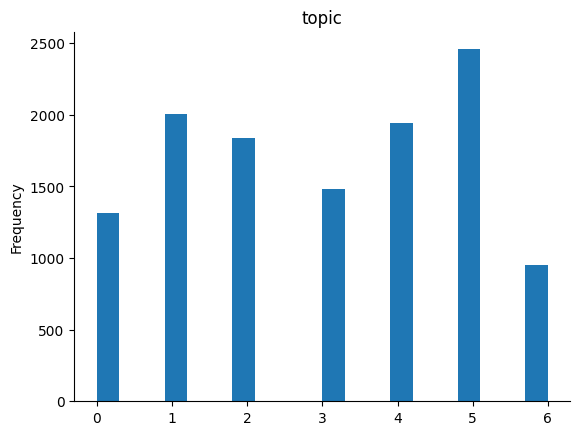

In [ ]:
from matplotlib import pyplot as plt
npr['topic'].plot(kind='hist', bins=20, title='topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data2=pd.read_csv('/content/quora_questions.csv')

In [ ]:
data2.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
cv2 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')


In [ ]:
dtm2 = cv2.fit_transform(data2['Question'])


In [ ]:
LDA2= LatentDirichletAllocation(n_components=7,random_state=42)


In [ ]:
LDA2.fit(dtm2)


LatentDirichletAllocation(n_components=7, random_state=42)

In [ ]:
len(LDA2.components_)

7

In [ ]:
LDA2.components_

array([[ 0.14302751,  0.18117197,  0.14642241, ...,  0.14285724,
         2.14149267,  0.14285724],
       [ 0.14359789, 68.66894325,  0.14285793, ...,  0.14285728,
         0.14285797,  0.14285728],
       [ 5.30622659,  0.15008675,  0.14285791, ...,  2.14285648,
         0.14285796,  2.14285648],
       ...,
       [ 0.14325168,  0.14313396,  0.14285777, ...,  0.14285725,
         0.1428578 ,  0.14285725],
       [ 0.24759557,  0.14293736,  2.13928835, ...,  0.14285723,
         0.14421791,  0.14285723],
       [26.64869167,  0.14315453,  0.14285781, ...,  0.14285726,
         0.14285784,  0.14285726]])

In [ ]:
features2=cv2.get_feature_names_out()

In [ ]:
len(LDA2.components_[0])

38669

In [ ]:
single_topic=LDA2.components_[0]

In [ ]:
single_topic.argsort()


array([34210,  6365, 23296, ..., 26057, 17507,  4632])

In [ ]:
single_topic[18302]


0.14285731762694745

In [ ]:
single_topic[38668]


0.14285724432274927

In [ ]:
top_word_indices = single_topic.argsort()[-10:]


In [ ]:
for index in top_word_indices:
  print(features[index])


dopey
angrier
ameera
crystalline
constellation
doorbell
personhood
ivs
excused
bakken


In [ ]:
for index,topic in enumerate(LDA2.components_):
  print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
  print([features[i] for i in topic.argsort()[-15:]])
  print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['digest', 'canes', 'persuasive', 'hated', 'monticello', 'dopey', 'angrier', 'ameera', 'crystalline', 'constellation', 'doorbell', 'personhood', 'ivs', 'excused', 'bakken']


THE TOP 15 WORDS FOR TOPIC #1
['pooping', 'klezmer', 'naval', 'frightfully', 'evicted', '080', 'hyperactive', 'impressionist', '648', 'csi', 'gonzalo', 'pooled', 'furious', 'health', 'bakken']


THE TOP 15 WORDS FOR TOPIC #2
['marisol', 'beeping', 'pommer', 'compatibility', 'cannabis', 'pacific', 'asl', 'crushed', 'excused', 'befits', 'bakken', 'doorbell', 'orville', 'constellation', 'garlic']


THE TOP 15 WORDS FOR TOPIC #3
['gonzalo', 'henrik', 'optioned', 'constellation', 'laszewski', 'impersonation', 'henriette', 'procrastinated', 'options', 'lately', 'bakken', 'formula', 'houghton', 'inveterate', 'laundered']


THE TOP 15 WORDS FOR TOPIC #4
['chamblee', 'crick', 'competitions', 'machu', 'intercession', 'bobotie', 'identification', 'eyeglasses', 'excerpts', 'excused', 'fiorina', '

In [ ]:
dtm2

<404289x38669 sparse matrix of type '<class 'numpy.int64'>'
	with 2002912 stored elements in Compressed Sparse Row format>

In [ ]:
dtm2.shape

(404289, 38669)

In [ ]:
len(data2)

404289

In [ ]:
topic_results=LDA2.transform(dtm2)

In [ ]:
topic_results.shape


(404289, 7)

In [ ]:
topic_results[0]

array([0.01789911, 0.31645888, 0.59414638, 0.01786013, 0.0178879 ,
       0.01787348, 0.01787413])

In [ ]:
topic_results[0].round(2)


array([0.02, 0.32, 0.59, 0.02, 0.02, 0.02, 0.02])

In [ ]:
data2.head()


,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
topic_results.argmax(axis=1)


array([2, 4, 0, ..., 0, 6, 5])

In [ ]:
data2['Topic'] = topic_results.argmax(axis=1)


In [ ]:
data2


,Question,Topic
0,What is the step by step guide to invest in sh...,2
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,4
2,How can I increase the speed of my internet co...,0
3,Why am I mentally very lonely? How can I solve...,5
4,"Which one dissolve in water quikly sugar, salt...",2
...,...,...
404284,How many keywords are there in the Racket prog...,1
404285,Do you believe there is life after death?,2
404286,What is one coin?,0
404287,What is the approx annual cost of living while...,6


from matplotlib import pyplot as plt
data2['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data2['Topic'].plot(kind='line', figsize=(8, 4), title='Topic')
plt.gca().spines[['top', 'right']].set_visible(False)

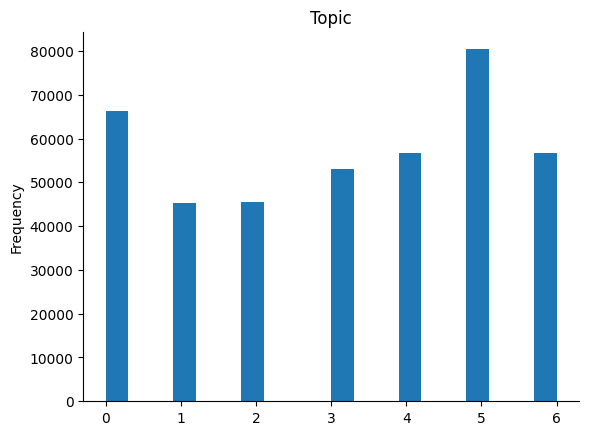

In [ ]:
from matplotlib import pyplot as plt
data2['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Topic modeling for vietnamese

In [ ]:
zip_file_path="/content/drive/MyDrive/ExtractedNews.zip"

In [ ]:
import zipfile
import json

In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:

    for file_info in zip_ref.infolist():

        if file_info.filename.endswith('.json'):

            with zip_ref.open(file_info) as json_file:
                json_data = json.load(json_file)



In [ ]:
json_data[1]['date']


'2021-12-23T17:43:04.472Z'

In [ ]:
data=pd.DataFrame(columns=['url','content','date'])

In [ ]:
data=data.append(pd.DataFrame(json_data),ignore_index=True)

<ipython-input-87-dd832557aedf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(json_data),ignore_index=True)


In [ ]:
data.head()

,url,content,date
0,https://vtv.vn/aff-suzuki-cup-2020/viet-nam-vs...,ĐT Việt Nam hoàn tất việc tập luyện chuẩn bị c...,2021-12-23T17:42:47.293Z
1,https://vtv.vn/kinh-te/dau-gia-dat-lien-tuc-la...,"Đấu giá đất giá ""trên trời"" rồi... ""bỏ cọc chạ...",2021-12-23T17:43:04.472Z
2,https://vnexpress.net/nuoc-mat-nhan-tao-co-the...,"Thứ năm, 23/12/2021, 08:00 (GMT+7)\nNước mắt n...",2021-12-23T17:43:08.988Z
3,https://vnexpress.net/my-chi-15-000-usd-che-co...,"Thứ năm, 23/12/2021, 14:23 (GMT+7)\nMỹ chi 15....",2021-12-23T17:43:17.256Z
4,https://vnexpress.net/no-ro-dich-vu-tao-web-lu...,"Thứ ba, 21/12/2021, 00:00 (GMT+7)\nNở rộ dịch ...",2021-12-23T17:45:00.997Z


In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import numpy as np

In [ ]:
from underthesea import word_tokenize



In [ ]:
content=data['content']

In [ ]:
content

0       ĐT Việt Nam hoàn tất việc tập luyện chuẩn bị c...
1       Đấu giá đất giá "trên trời" rồi... "bỏ cọc chạ...
2       Thứ năm, 23/12/2021, 08:00 (GMT+7)\nNước mắt n...
3       Thứ năm, 23/12/2021, 14:23 (GMT+7)\nMỹ chi 15....
4       Thứ ba, 21/12/2021, 00:00 (GMT+7)\nNở rộ dịch ...
                              ...                        
1822    thuy.luu@baogiaothong.vn\n18/12/2021 07:15\nDù...
1823    Bộ GTVT đề xuất thí điểm bay quốc tế thường lệ...
1824    Luật Kinh doanh bảo hiểm cho phép doanh nghiệp...
1825    Thứ năm, 23/12/2021, 07:29 (GMT+7)\nOanh tạc c...
1826    Ngân hàng tăng huy động vốn dài ngày để khắc p...
Name: content, Length: 1827, dtype: object

In [ ]:
tokenized_doc=[word_tokenize(doc) for doc in content]

In [ ]:
tokenized_doc[1]

['Đấu giá',
 'đất',
 'giá',
 '"',
 'trên',
 'trời',
 '"',
 'rồi',
 '...',
 '"',
 'bỏ',
 'cọc chạy',
 'lấy người',
 '"',
 'Giao dịch',
 'chững',
 'lại',
 'chờ',
 'tăng giá',
 'quanh',
 'khu',
 'Thủ Thiêm Các',
 'cuộc',
 'đấu giá',
 'đất',
 'tại',
 'các',
 'địa phương',
 'gần',
 'đây',
 'đã',
 'gây',
 'nên',
 'các',
 'cơn',
 '"',
 'địa chấn',
 '"',
 'trên',
 'thị trường',
 'bất động sản',
 '.',
 'Nếu như',
 'trước đây',
 ',',
 'các',
 'tiêu cực',
 'trong',
 'quá trình',
 'đấu giá',
 'thường',
 'được',
 'nhắc',
 'tới',
 'là',
 'sử dụng',
 'quân xanh',
 ',',
 'quân',
 'đỏ',
 ',',
 'thỏa thuận',
 'để',
 'dìm giá',
 'thì',
 'nay',
 'một',
 'điều',
 'ngược lại',
 'đang',
 'diễn',
 'ra',
 'đó',
 'là',
 'giá',
 'trúng',
 'đấu giá',
 'cao',
 'gấp',
 'nhiều',
 'lần',
 'so',
 'với',
 'giá',
 'khởi điểm',
 '.',
 'Điểm',
 'tích cực',
 'là',
 'việc',
 'này',
 'sẽ',
 'mang',
 'lại',
 'nguồn',
 'thu',
 'ngân sách',
 'dồi dào',
 'cho',
 'địa phương',
 ',',
 'tuy nhiên',
 'cũng',
 'nảy sinh',
 'lo ngại',

In [ ]:
len(tokenized_doc)

1827

In [ ]:
dictionary=corpora.Dictionary(tokenized_doc)

In [ ]:
len(dictionary)

83977

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_doc]


In [ ]:
lda_model=LdaModel(corpus,num_topics=7,id2word=dictionary)

In [ ]:
print(lda_model)

LdaModel<num_terms=83977, num_topics=7, decay=0.5, chunksize=2000>


In [ ]:
results=pd.DataFrame(columns=['content','Topic'])

In [ ]:
for i, doc in enumerate(tokenized_doc):
  Bow=dictionary.doc2bow(doc)
  topic_id,_=max(lda_model.get_document_topics(Bow),key=lambda x:x[1])

  results.loc[i]=[''.join(content[i]),topic_id]


In [ ]:
results

,content,Topic
0,ĐT Việt Nam hoàn tất việc tập luyện chuẩn bị c...,4
1,"Đấu giá đất giá ""trên trời"" rồi... ""bỏ cọc chạ...",4
2,"Thứ năm, 23/12/2021, 08:00 (GMT+7)\nNước mắt n...",5
3,"Thứ năm, 23/12/2021, 14:23 (GMT+7)\nMỹ chi 15....",4
4,"Thứ ba, 21/12/2021, 00:00 (GMT+7)\nNở rộ dịch ...",4
...,...,...
1822,thuy.luu@baogiaothong.vn\n18/12/2021 07:15\nDù...,4
1823,Bộ GTVT đề xuất thí điểm bay quốc tế thường lệ...,4
1824,Luật Kinh doanh bảo hiểm cho phép doanh nghiệp...,5
1825,"Thứ năm, 23/12/2021, 07:29 (GMT+7)\nOanh tạc c...",4


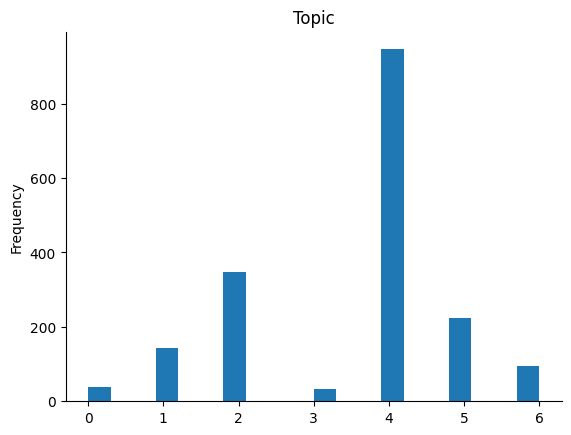

In [ ]:
from matplotlib import pyplot as plt
results['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)